# Warm-Up - 4/8/24

Q. What does the AUC show us? What are the options for calculating it based on if the data is balanced or imbalanced?
A. AUC tends to show the summarization of the entire location of the ROC curve rather than depending on a specific operating point. AUC is the area under the curve. If the data is imbalanced, precision recall curve would be better than true positives.


Q. Write a python function that calculates the average of a list of numbers. For example, it should be called as follows:
numbers = [10, 20, 30, 40, 50]
average = calculate_average(numbers)
print("The average is",average)

In [1]:
def calculate_average(numbers):
    return sum(numbers) / len(numbers)
numbers = [10, 20, 30, 40, 50]
average = calculate_average(numbers)
print ("Average of the list =", average)

Average of the list = 30.0


# Unsupervised Learning

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv('USArrests.csv')
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Clustering

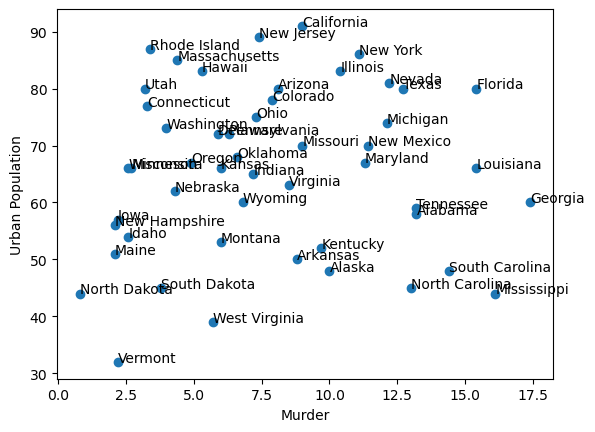

In [3]:
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis=1)
y = crime_df['State']

plt.scatter(X['Murder'],X['UrbanPop'])
# Enumerating allows you to keep track of the index associated with each iteration
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))
    
plt.xlabel('Murder')
plt.ylabel('Urban Population')
plt.show()

In [4]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    # Distortions is the average of the squared distance from the cluster center to the data points
    # in Euclidean space.
    # Euclidean space = standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_, 
                                    'euclidean')
    distortion = sum(np.min(distance,axis =1))/X.shape[0]
    distortions.append(distortion)
    
    #inertia is calculated by measuring the distance between
    # each data point and the centroid and summing
    # the squared across the cluster. A good model
    # is one with low inertia or distprtion
    # AND a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

Text(0.5, 1.0, 'Elbow Method with Distortion')

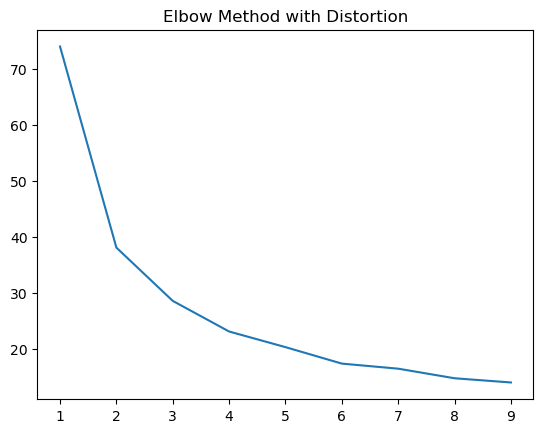

In [5]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

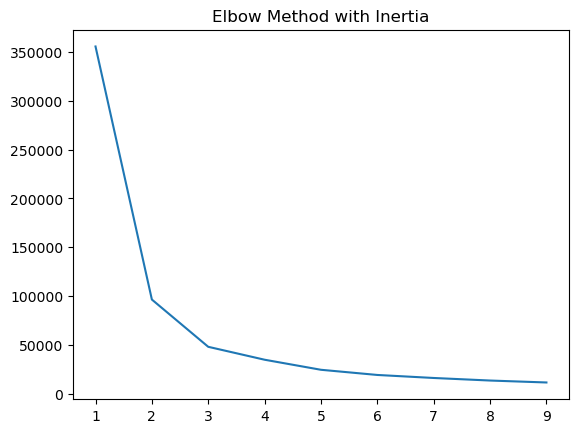

In [6]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

# Hierarchical

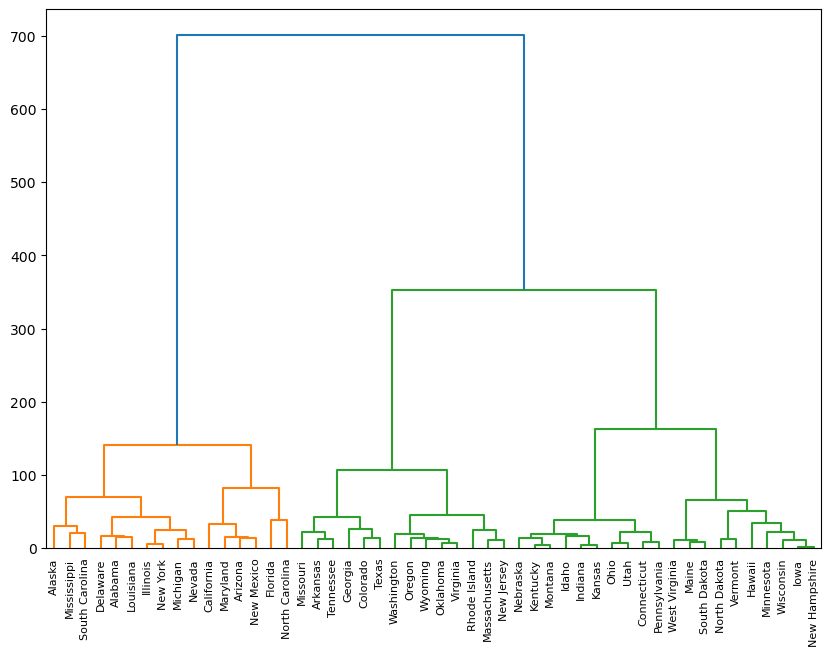

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels= list(y))

In [9]:
from sklearn.cluster import AgglomerativeClustering
# divides the population into several clusters such that the data points
# in the same cluster are more similar to each other and the data points in
# different clusters are dissimilar
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

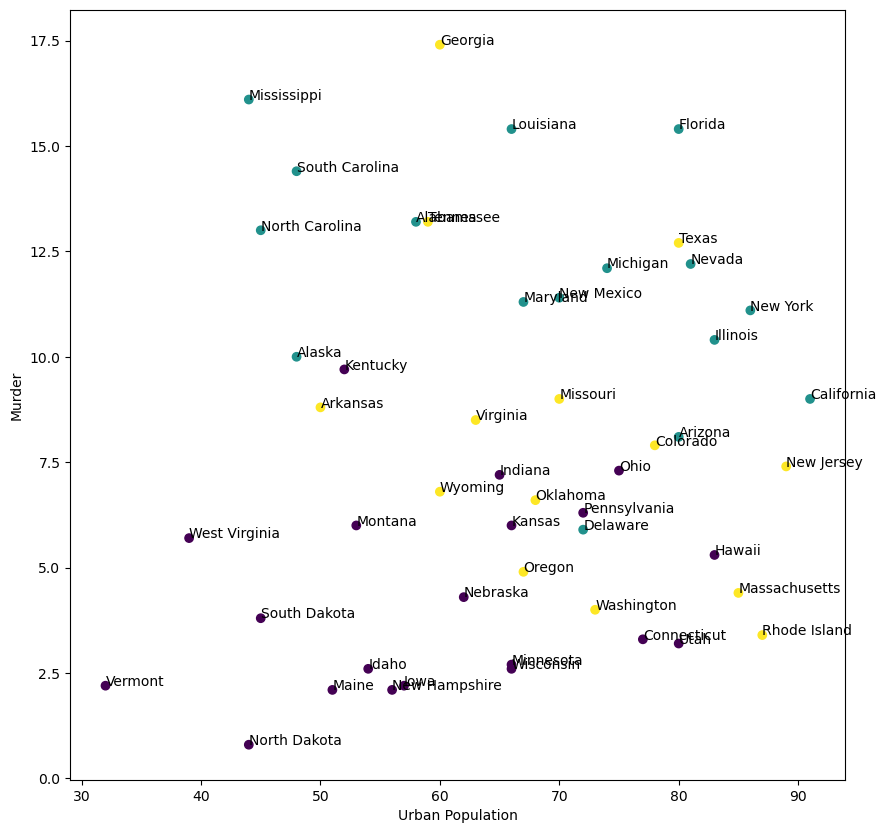

In [11]:
plt.figure(figsize = (10,10))
plt.scatter(X['UrbanPop'],X['Murder'], c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['UrbanPop'][i],X['Murder'][i]))
    
plt.ylabel('Murder')
plt.xlabel('Urban Population')
plt.show()

# Dimensionality Reduction

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#train test split - cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,
                                                    random_state=32,
                                                    stratify=y)

model = LogisticRegression(random_state=32).fit(X_train, y_train)

#predicted outcome
y_predicted = model.predict(X_test)

print(model.score(X_test,y_test))

0.7922077922077922


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


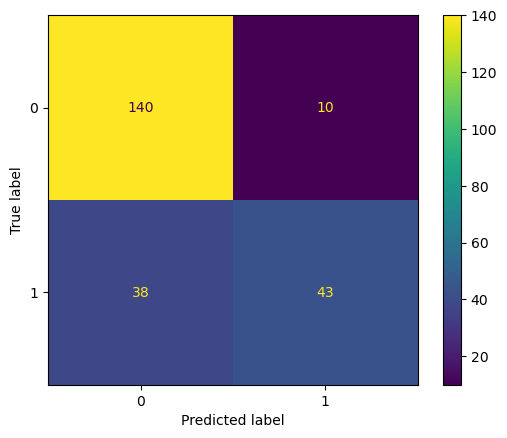

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)
# singular value decomposition = factorization technique for real or comple numbers
# in a matrix
# in short, it is untangling patterns in the numbers using matrix decomposition (linear algebra concept)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=32).fit(X_train_svd, y_train)

model.score(X_test_svd, y_test)

0.70995670995671

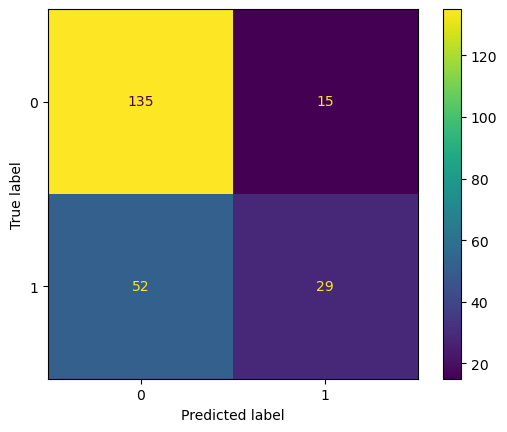

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)